# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [169]:
!pip install xgboost

In [170]:
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV

## Data Overview

- Observations
- Sanity checks

In [171]:
easyvia = pd.read_csv("EasyVisa.csv")

In [172]:
#copying data to avoid any changes to original data
data = easyvia.copy()

In [173]:
# checking the shape of the data
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

There are 25480 rows and 12 columns.


In [174]:
# let's view a sample of the data
data.sample(
    20, random_state=2)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
18818,EZYV18819,Asia,Master's,Y,N,2939,2005,Midwest,76704.6600,Year,Y,Certified
2661,EZYV2662,Africa,Master's,N,N,20199,2005,South,120180.8100,Year,N,Denied
11440,EZYV11441,Africa,Master's,Y,N,1213,1998,West,40071.9100,Year,Y,Certified
10861,EZYV10862,Asia,Master's,Y,N,603,1994,Northeast,129.3500,Hour,Y,Certified
4769,EZYV4770,Asia,Bachelor's,Y,N,2223,1952,South,160635.7000,Year,Y,Denied
20524,EZYV20525,Europe,Doctorate,Y,N,1227,1989,Northeast,93891.6700,Year,Y,Certified
14631,EZYV14632,Asia,Master's,Y,N,789,2012,Northeast,37197.2700,Year,Y,Certified
14053,EZYV14054,North America,Bachelor's,Y,N,2969,1993,South,119719.8800,Year,Y,Certified
12525,EZYV12526,Asia,Master's,Y,Y,2538,1848,Midwest,143866.5300,Year,Y,Certified
7172,EZYV7173,Asia,Bachelor's,N,Y,2324,1937,Island,93560.1200,Year,Y,Certified


* For now no values seem to be missing. We will investigate this later.

* Columns are formatted correctly.

In [175]:
# checking for duplicate values in the data
data.duplicated().sum()

0

* There are no duplicate values in the data.

In [176]:
# checking column datatypes and number of non-null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


* There are 3 numeric (*float* and *int* type) and  9 string (*object* type) columns in the data.
* There are no null values in the dataset.

In [177]:
# Let's look at the statistical summary of the data
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
case_id,25480,25480,EZYV01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
continent,25480,6,Asia,16861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_of_employee,25480,4,Bachelor's,10234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_job_experience,25480,2,Y,14802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requires_job_training,25480,2,N,22525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_employees,25480.0,NaN,NaN,NaN,5667.04321,22877.928848,-26.0,1022.0,2109.0,3504.0,602069.0
yr_of_estab,25480.0,NaN,NaN,NaN,1979.409929,42.366929,1800.0,1976.0,1997.0,2005.0,2016.0
region_of_employment,25480,5,Northeast,7195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prevailing_wage,25480.0,NaN,NaN,NaN,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27
unit_of_wage,25480,4,Year,22962,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* Case_id has only unique values and will not be necessary for the model. We will therefore delete this column.
* Most applicants come from Asia
* Most applicants have a education "Bachelor"
* About 58.1% of applicants have job experience.
* About 88.4% of applicants do not need job training
* The average number of staff for the employer is about 5667 employees.
* The minimum number of staff for the employer is -26. It is strange to have a negative number here. This will need to be investigated further.
* Most applicants are applying for the northeast region
* The average employee is applying for a job with a salary of 74'455 per year
* About 89.4% of applicants are applying for a full time position
* Most applicants were certified. 66.8% 

In [178]:
# Dropping the columns with all unique values
data = data.drop(["case_id"], axis=1)

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification? 

2. How does the visa status vary across different continents? 
 
3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 
 
4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa? 
 
5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

### Univariate Analysis

In [179]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [180]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [181]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [182]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

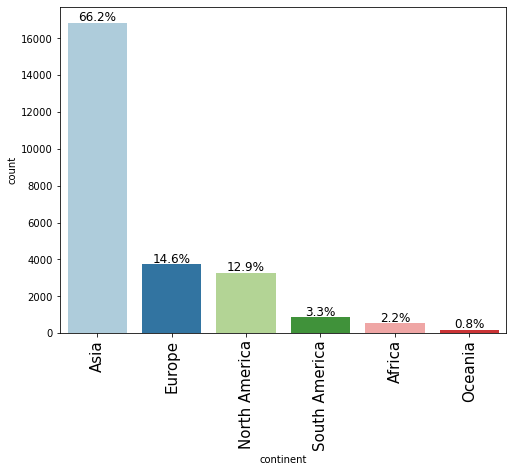

In [183]:
#How does the visa status vary across different continents? 
labeled_barplot(data,"continent",perc=True)

* Most applications come from Asia. 66.2%. 
* Second most common is Europe (14.6%) and third is North America (12.9%)

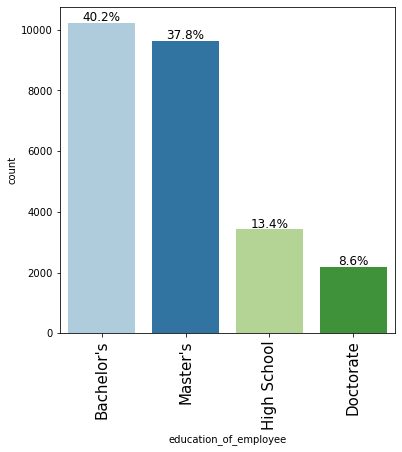

In [184]:
#Education level
labeled_barplot(data,"education_of_employee",perc=True)

* Most applications have bachelor's. 40.2% 
* Second most common is a master's (37.8%), followed by a high school diploma (13.4%), followed by a doctorate (8.6%).

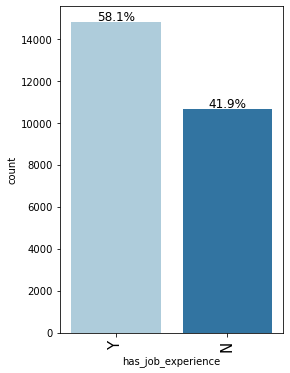

In [185]:
#Has job experience
labeled_barplot(data,"has_job_experience",perc=True)

* 58.1% of applicants have job experience. The others have no previous experience.

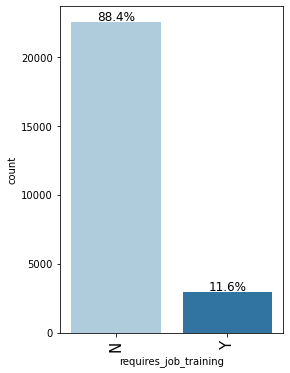

In [186]:
#Requires job training
labeled_barplot(data,"requires_job_training",perc=True)

* 88.4% of applicants do not require job training.

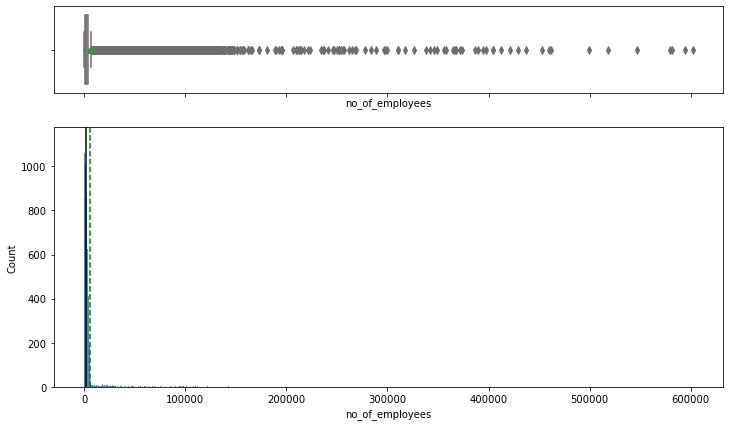

In [187]:
#Number of employees working for the company
histogram_boxplot(data,"no_of_employees")

* Heavily right-skewed with many outliers on the right end of the box plot. Difficult to interprete. For visual purposes, let's narrow the focus ti 100'000 employees 
* Companies selected by the applicants range from small buisness (<1500) to large busiess (>600'000)

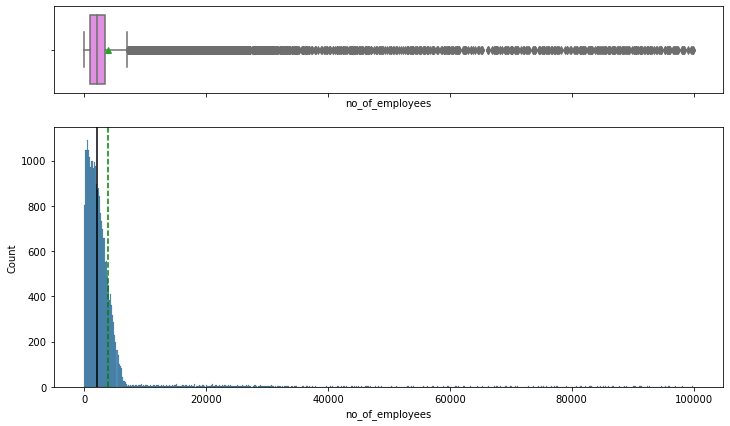

In [188]:
no_of_employees = data[data["no_of_employees"]<100000]

histogram_boxplot(no_of_employees,"no_of_employees")

* Again we can see that the graph is heavily right-skewed with many outliers on the right end of the box plot.

In [189]:
#Checking companies with a negative staff count
no_of_employees2 = data[data["no_of_employees"]<0]

no_of_employees2.shape

(33, 11)

* 33 companies employ less than 0 employees.This does not make sense and should not be trusted. We will therefore not include these rows for the model. 

In [190]:
data.drop(data.loc[data['no_of_employees']<0].index, inplace=True)
data.shape

(25447, 11)

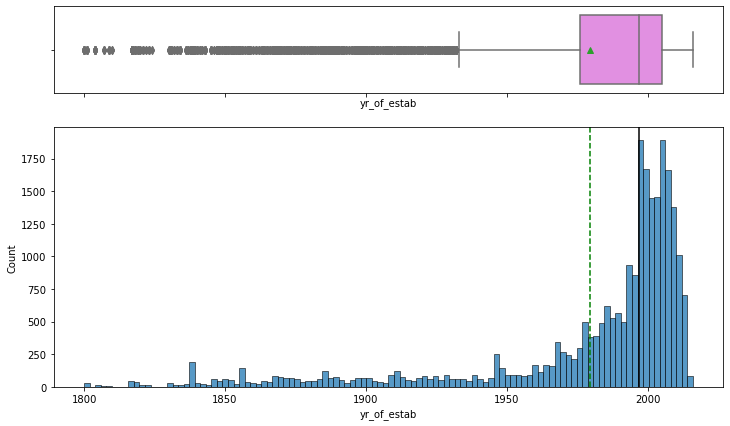

In [191]:
#Year company was established
histogram_boxplot(data,"yr_of_estab")

* Distribution is left skewed
* Median is around 1997
* There are outliers on the left end of the box plot.

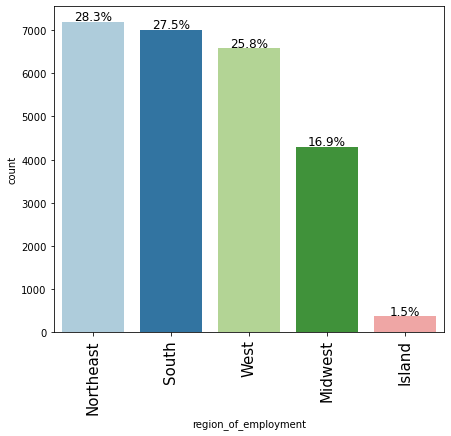

In [192]:
#Region of employment
labeled_barplot(data,"region_of_employment",perc=True)

* Most applications are looking for work in the Northeast region (28.3%)
* Second most common is the South (27.5%), followed by the West (25.8%)
* Island region is the least common (1.5%)

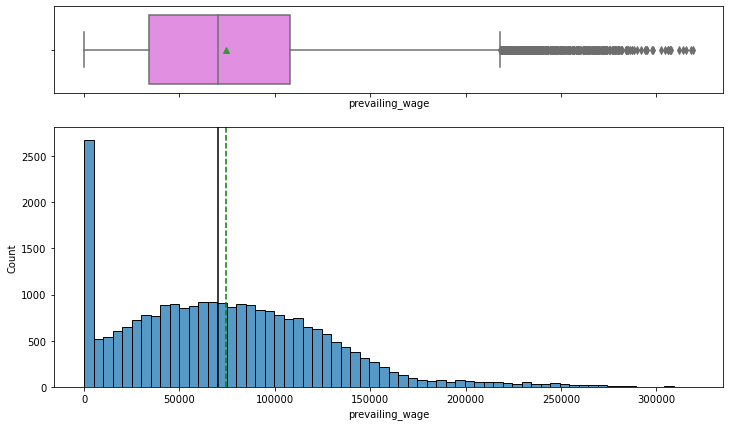

In [193]:
#Prevailing wage
histogram_boxplot(data,"prevailing_wage")

* Distribution is right skewed
* Median is around 65'000
* There are outliers on the right end of the box plot.
* There are several cases with a prevailing wage of 0. It is possible these are unpaid internships.
* Maximum prevailing wage is >300'000

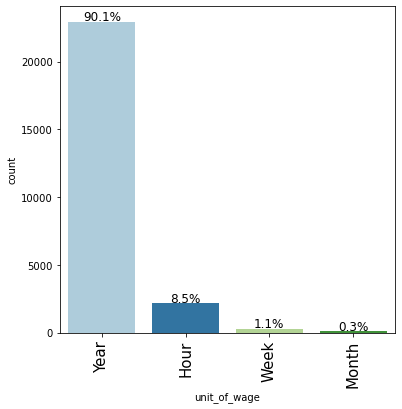

In [194]:
#Unit of wage
labeled_barplot(data,"unit_of_wage",perc=True)

* Most common is year (90.1%)
* Second most common is hour (8.5%), followed by week (1.1%), followed by month (0.3%)

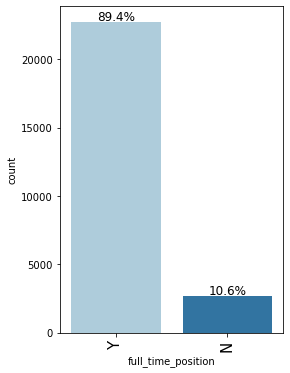

In [195]:
#Full time position
labeled_barplot(data,"full_time_position",perc=True)

* Most applicants are applying for full time positions (89.4%)

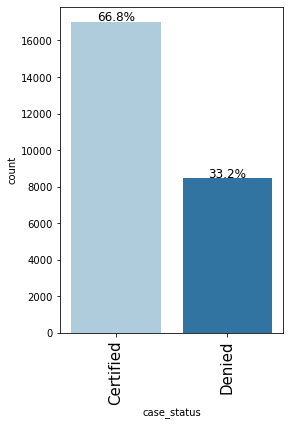

In [196]:
#Case Status
labeled_barplot(data,"case_status",perc=True)

* 66.8% of applicants are certified and approved for a work visa. 33.2% are denied. This means that the majority of applications are accepted.

### Bivariate Analysis

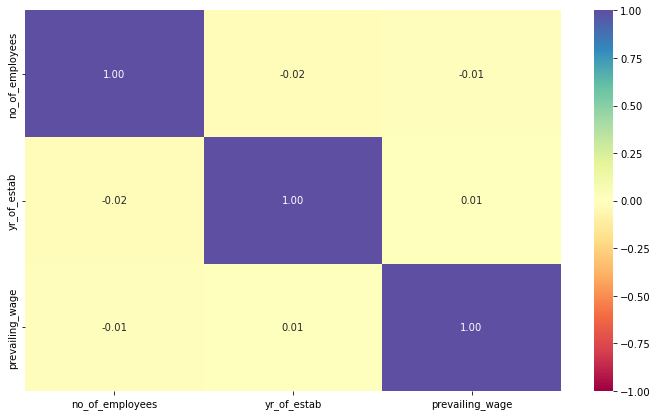

In [197]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* There are no strongly correlated patterns between any of the features

case_status    Certified  Denied    All
continent                              
All                17001    8446  25447
Asia               11001    5839  16840
North America       2037    1250   3287
Europe              2953     774   3727
South America        492     359    851
Africa               396     154    550
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


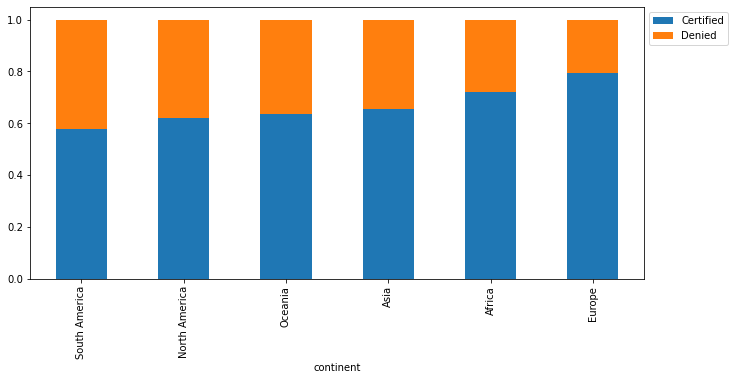

In [198]:
#Comparing Continent and Case Status
stacked_barplot(data,"continent","case_status")

* There are differences between continents
* Applicants from South America have about 60% chance of being certified. The lowest of the continents
* Applicants from Europe have about 80% chance of being certified. The highest of the continents

case_status            Certified  Denied    All
education_of_employee                          
All                        17001    8446  25447
Bachelor's                  6362    3858  10220
High School                 1164    2252   3416
Master's                    7565    2057   9622
Doctorate                   1910     279   2189
------------------------------------------------------------------------------------------------------------------------


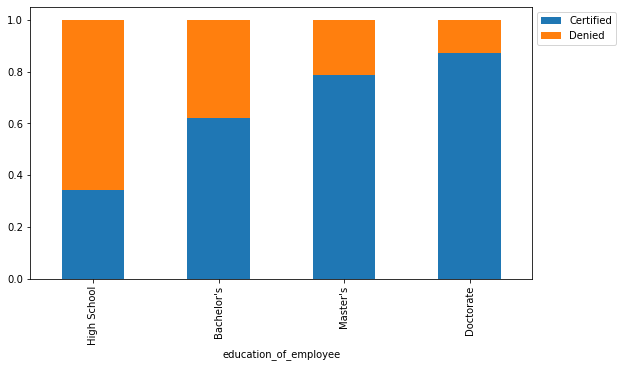

In [199]:
#Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?
stacked_barplot(data,"education_of_employee","case_status")

* Applicants with a higher level of education are more likely to be certified.
* Applicants with only a high school diploma have about 35% chance of being certified. The lowest of the education levels
* Applicants with a doctorate have about 90% chance of being certified. The highest of the education levels

case_status         Certified  Denied    All
has_job_experience                          
All                     17001    8446  25447
N                        5986    4675  10661
Y                       11015    3771  14786
------------------------------------------------------------------------------------------------------------------------


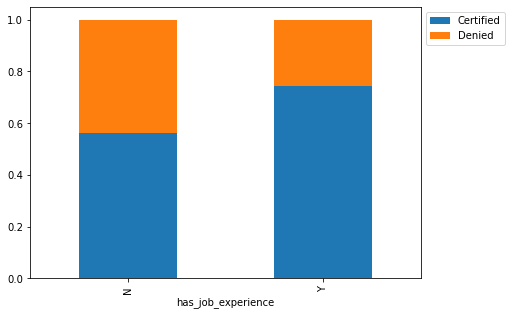

In [200]:
# Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 
stacked_barplot(data,"has_job_experience","case_status")

* Applicants with no job exerpience have less chance of being certified. About 60%
* Applicants with job experience have about 75% chance of being certified. 

case_status            Certified  Denied    All
requires_job_training                          
All                        17001    8446  25447
N                          15000    7498  22498
Y                           2001     948   2949
------------------------------------------------------------------------------------------------------------------------


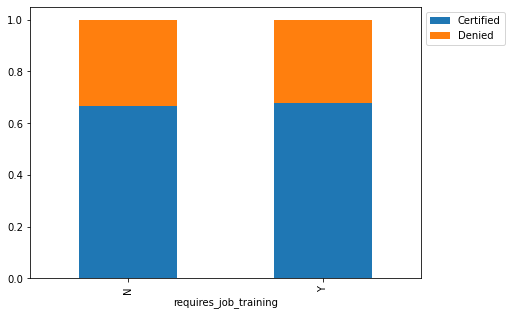

In [201]:
#Comparing job training and Case status
stacked_barplot(data,"requires_job_training","case_status")

* No observed differences

case_status           Certified  Denied    All
region_of_employment                          
All                       17001    8446  25447
Northeast                  4524    2665   7189
West                       4097    2481   6578
South                      4908    2098   7006
Midwest                    3246    1053   4299
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


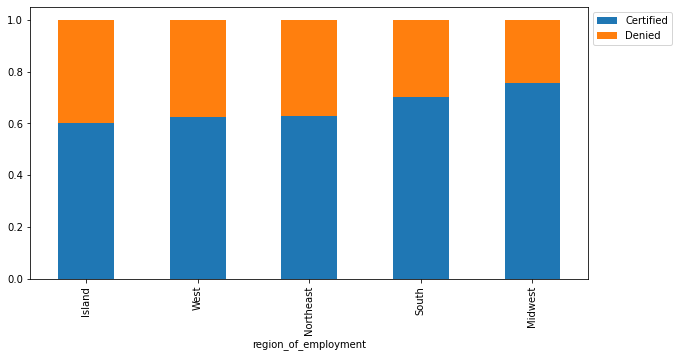

In [202]:
#Comparing region of employement and case status
stacked_barplot(data,"region_of_employment","case_status")

* Slight differences between the regions
* Applicants who apply to the Midwest have about 75% chance of being certified. The highest of the regions.
* Applicants who apply to either the Island, the West, or the Northeast region have about 60% chance of being certified. The lowest of the regions.

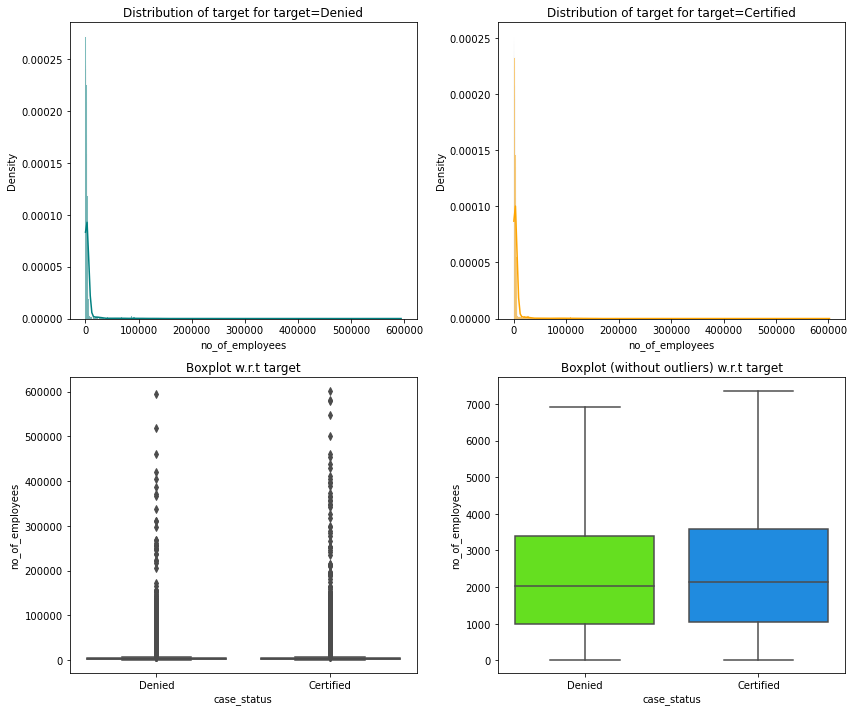

In [213]:
# Comparing Number of employees and Case status
distribution_plot_wrt_target(data,"no_of_employees","case_status")

* Trends in the distributions are similiar. Both distributions are right tailed.
* Applicants who apply for a larger company are slightly more likely to be certified. However the range is wide. 
* There are many outliers for both boxplots. 

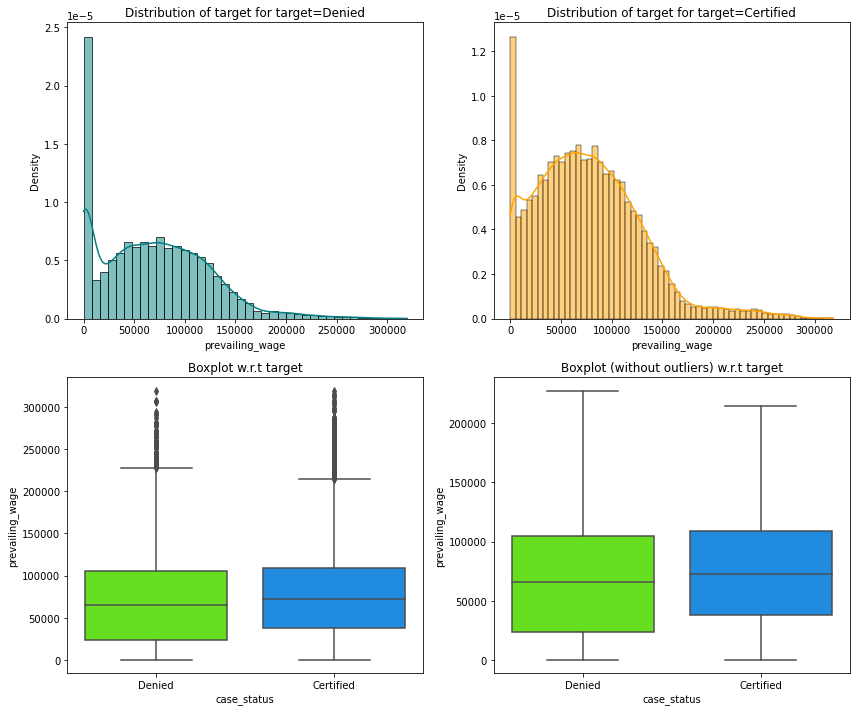

In [204]:
# The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?
distribution_plot_wrt_target(data,"prevailing_wage","case_status")

* Trends in the distributions are similiar. Both distributions are right tailed.
* Applicants who apply for a position with a lower prevailing wage are less likely to be certified. However the range is wide. 
* There are outliers for both boxplots. 

case_status   Certified  Denied    All
unit_of_wage                          
All               17001    8446  25447
Year              16030    6903  22933
Hour                747    1406   2153
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


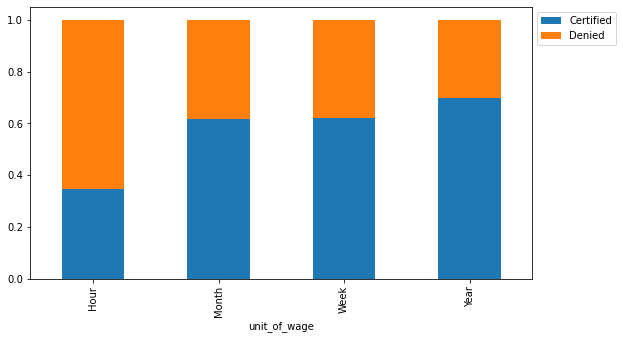

In [205]:
#In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa? 
stacked_barplot(data,"unit_of_wage","case_status")

* There are differences between the units of wage
* Applicants who apply for hourly salaries have about 40% chance of being certified. The lowest of the units of wage.
* Applicants who apply for yearly salaries have about 70% chance of being certified. The highest of the units of wage.

case_status         Certified  Denied    All
full_time_position                          
All                     17001    8446  25447
Y                       15146    7595  22741
N                        1855     851   2706
------------------------------------------------------------------------------------------------------------------------


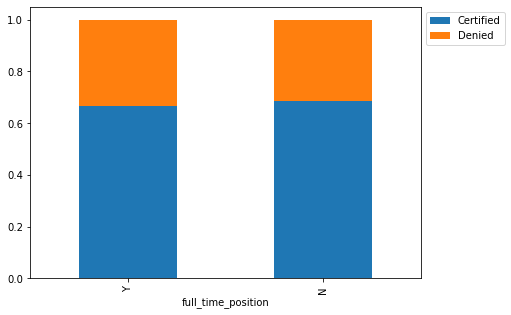

In [206]:
#Comparing full time positions and case status
stacked_barplot(data,"full_time_position","case_status")

* No observed differences

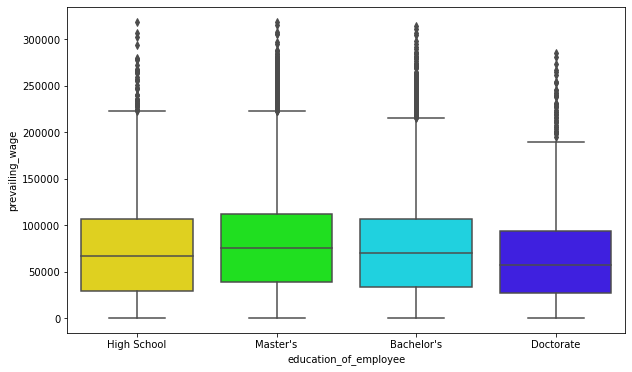

In [207]:
#Comparing education level and prevailing wage
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=data, x="education_of_employee", y="prevailing_wage", palette="gist_rainbow"
)
plt.show()

* Slight differences between the education level and the prevailing wage
* Applicants with a master's are on average applying for the highest salary positions.
* Applicants with a doctorate are on average applying for the lowest salary positions.
* There are outliers for all boxplots.

full_time_position        N      Y    All
education_of_employee                    
All                    2706  22741  25447
Master's               1738   7884   9622
Bachelor's              683   9537  10220
High School             205   3211   3416
Doctorate                80   2109   2189
------------------------------------------------------------------------------------------------------------------------


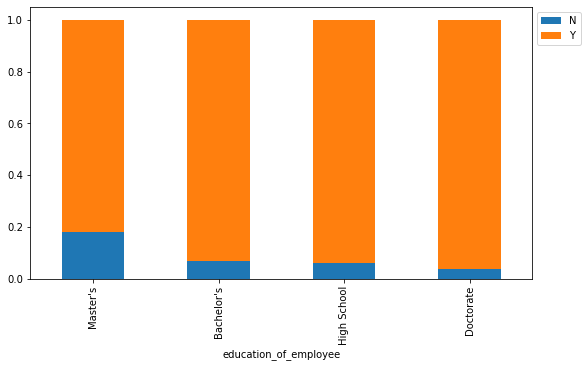

In [208]:
#Comparing education level and full time positions
stacked_barplot(data,"education_of_employee","full_time_position")

* Slight differences between the education level and position type
* 20% of applicants with a master's are applying for a part-time position. The highest of the education levels
* The others are unlikely to apply for a part-time position.
* In general, most applicants are applying for a full time position.

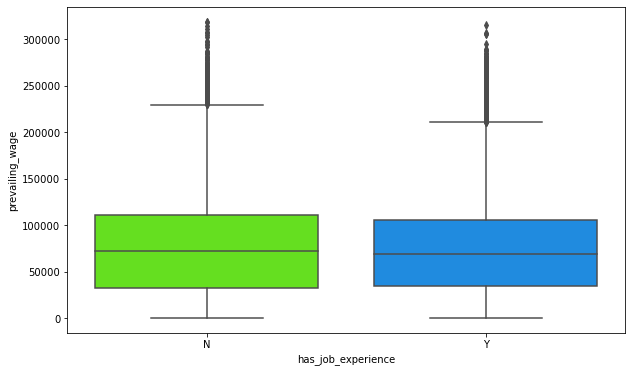

In [209]:
#Comparing job experience and prevailing wage
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=data, x="has_job_experience", y="prevailing_wage", palette="gist_rainbow"
)
plt.show()

* No observed differences

requires_job_training      N     Y    All
has_job_experience                       
All                    22498  2949  25447
N                       8976  1685  10661
Y                      13522  1264  14786
------------------------------------------------------------------------------------------------------------------------


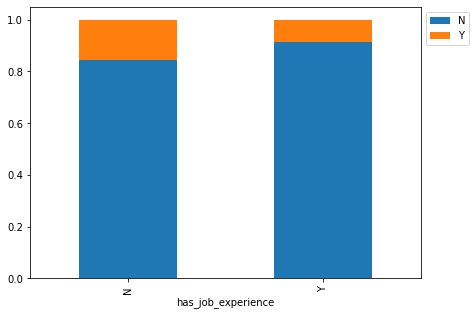

In [210]:
#Comparing job experience and training
stacked_barplot(data,"has_job_experience","requires_job_training")

* Slight differences
* Applicants with job experience are less likely to need job training. About 10% need training
* Applicants with no job experience are more likely to need job training. About 20% need training

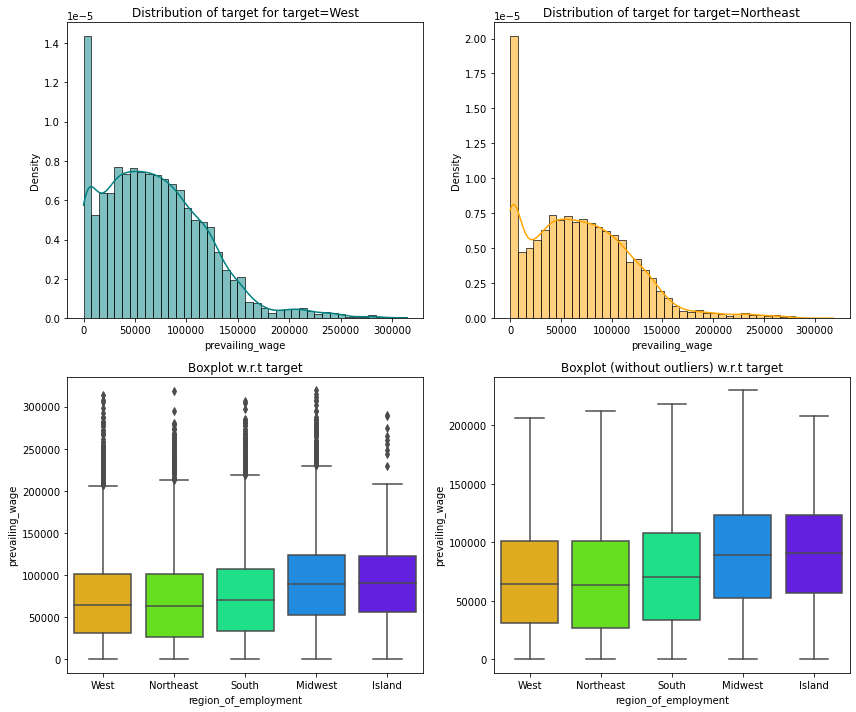

In [211]:
#Comparing region of employment and prevailing wage
distribution_plot_wrt_target(data,"prevailing_wage","region_of_employment")

* Trends in the distributions are similiar. Both distributions are right tailed.
* Positions in Island have the highest prevailing wage, followed by the Midwest, followed by the South.
* Positions in the West have the lowest prevailing wage.
* There are outliers for all boxplots.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering 
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [120]:
#Checking for missing values
data.isna().sum()

continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

* There are no missing values

* No feature engineering needed

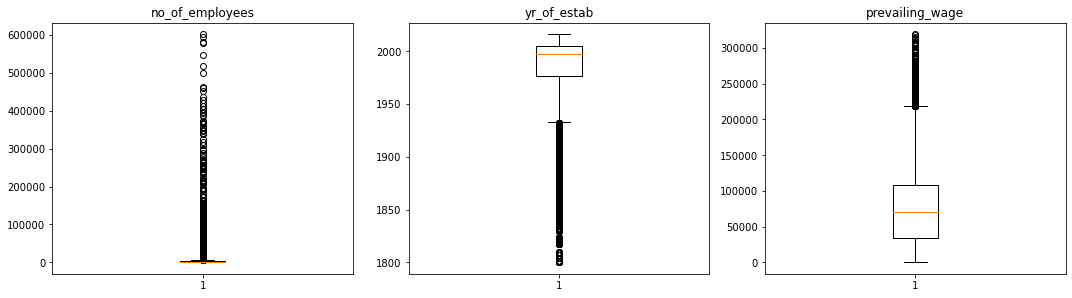

In [121]:
# creating a list of non-tag columns
out_cols = [
    item for item in data.select_dtypes(include=np.number).columns if "tag" not in item
]

plt.figure(figsize=(15, 35))

for i, variable in enumerate(out_cols):
    plt.subplot(9, 3, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* There are quite a few outliers in the data.
* However, we will not treat them as they are proper values

In [122]:
#Preparing data for modelling
data["case_status"] = data["case_status"].apply(lambda x: 1 if x == "Certified" else 0)

X = data.drop("case_status", axis=1)
Y = data.pop("case_status")


X = pd.get_dummies(X, drop_first=True) ## Converting object features into intergers by creating dummy variables

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y)  

In [123]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17812, 21)
Shape of test set :  (7635, 21)
Percentage of classes in training set:
1    0.668089
0    0.331911
Name: case_status, dtype: float64
Percentage of classes in test set:
1    0.668107
0    0.331893
Name: case_status, dtype: float64


* Around 66.8% of observations belongs to class 1 (Certified) and 33.2% observations belongs to class 0 (Denied), and this is preserved in the train and test sets.

* No data manipulation was needed. We can move on to the next stage of the analysis. 

## Building bagging, random forest, and boosting models

In [124]:
#Before building the model, let's create functions to calculate different metrics- Accuracy, Recall and Precision and plot the confusion matrix.

## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [125]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    #Predicting on train and tests
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    #Accuracy of the model
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    #Recall of the model
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    #Precision of the model
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    train_f1 = metrics.f1_score(y_train,pred_train)
    test_f1 = metrics.f1_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
        print("F1 score on training set : ",metrics.f1_score(y_train,pred_train))
        print("F1 score on test set : ",metrics.f1_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

## Model performance evaluation

**Model evaluation criterion**

**Model can make wrong predictions as:**
- Predicting a applicant will be denied but in reality, the applicant should be certified (FN)
- Predicting a applicant will be certified but in reality, the applicant should be denied (FP)

**Which case is more important?**

- Both are important.
- Applicants who were wrongfully denied is a miss opportunity for company and the economy since they were suitable candidates.
- Applicants who were wrongfully certified are taking up a position that should have been filled by a US citizen. A missed opportunity for the local workforce. 

**F1 score**

- For the rest of this analysis we will focus on the F1 score for determining the credibility of the model. The higher the F1 score, the more FN and FP will be minimized. 

### Bagging Classifier

In [126]:
#base_estimator for bagging classifier is a decision tree by default
bagging_estimator=BaggingClassifier(random_state=1)
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(random_state=1)

In [127]:
#Using above defined function to get accuracy, recall, precision and F1_score on train and test set
bagging_estimator_score=get_metrics_score(bagging_estimator)

Accuracy on training set :  0.9846732539860769
Accuracy on test set :  0.7012442698100851
Recall on training set :  0.9858823529411764
Recall on test set :  0.7792589688296413
Precision on training set :  0.9911295091661738
Precision on test set :  0.7748538011695907
F1 score on training set :  0.9884989678560896
F1 score on test set :  0.7770501417261265


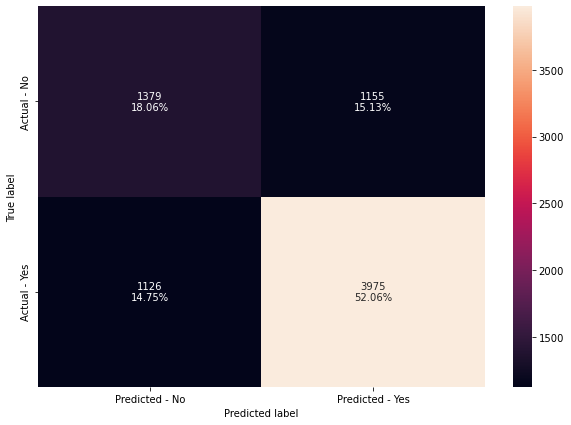

In [128]:
make_confusion_matrix(bagging_estimator,y_test)

* Model on the training set is very high. However it is significantly higher than the training set. This suggests overfitting. 
* Scores for Accuracy, Recall, Precision, and F1 score are similiar for the training set. Around 0.98
* Scores for Recall, Precision, and F1 score are similiar for the test set. Around 0.77. Accuracy is around 0.70.

* Let's try the default random forest model

### Random Forest

In [129]:
#Train the random forest classifier
rf_estimator=RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [130]:
#Using above defined function to get accuracy, recall, precision and F1_score on train and test set
rf_estimator_score=get_metrics_score(rf_estimator)

Accuracy on training set :  1.0
Accuracy on test set :  0.7210216110019646
Recall on training set :  1.0
Recall on test set :  0.832973926681043
Precision on training set :  1.0
Precision on test set :  0.7687714854351366
F1 score on training set :  1.0
F1 score on test set :  0.7995859992472715


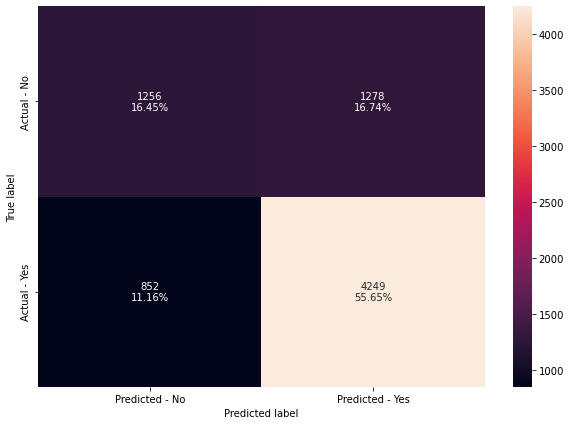

In [131]:
make_confusion_matrix(rf_estimator,y_test)

* Model on the training set is perfect. However it is significantly higher than the training set. This suggests overfitting. 
* Scores for Accuracy, Recall, Precision, and F1 score are all 1.0
* Scores for Accuracy, Recall, Precision, and F1 score vary between 0.72 and 0.83.
* Despite overfitting, the random forest model is slightly better than the bagging model in terms of Accuracy, Recall, and F1 score. Precision is around the same.   

* Now let's try the 3 default Boosting models. AdaBoost Classifier, Gradient Boosting Classifier, and XGBoost Classifier

### AdaBoost Classifier

In [132]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [133]:
#Using above defined function to get accuracy, recall, precision and F1_score on train and test set
abc_score=get_metrics_score(abc)

Accuracy on training set :  0.7405681562991242
Accuracy on test set :  0.7338572364112639
Recall on training set :  0.8908403361344538
Recall on test set :  0.8774750049009998
Precision on training set :  0.7614019966961143
Precision on test set :  0.7608363080061193
F1 score on training set :  0.8210510010455794
F1 score on test set :  0.8150036416605972


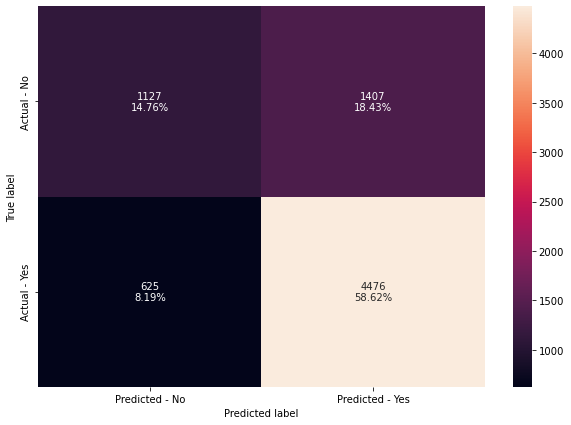

In [134]:
make_confusion_matrix(abc,y_test)

* The AdaBoost Classifer model is not overfitting and is therefore a improvement on the Random forest model.
* The model is also an improvement on the test set in terms of Accuracy, Recall, and F1 score. Precision is slightly lower.  

* Let's try the default Gradient Boosting Classifier model

### Gradient Boosting Classifier

In [135]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [136]:
#Using above defined function to get accuracy, recall, precision and F1_score on train and test set
gbc_score=get_metrics_score(gbc)

Accuracy on training set :  0.7572423085560297
Accuracy on test set :  0.7476096922069417
Recall on training set :  0.8805042016806722
Recall on test set :  0.8678690452852382
Precision on training set :  0.7831091180866966
Precision on test set :  0.7794014084507043
F1 score on training set :  0.8289556962025317
F1 score on test set :  0.8212596234115574


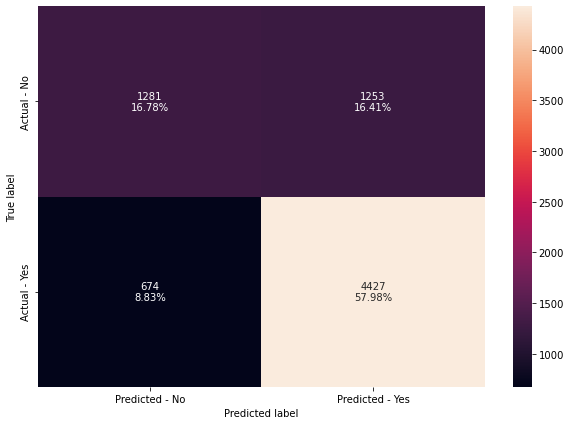

In [137]:
make_confusion_matrix(gbc,y_test)

* The Gradient Boosting Classifier model is not overfitting.
* Results are very similiar compared to the AdaBoost model. Slightly higher score in terms of Accuracy, Precision and F1 score. But slightly lower score for Recall. 
* Since F1 score our point of focus we can deduce that the Gradient Boosting Classifier model is a slight improvement.

* Let's try the default XGBoost Classifier model

In [138]:
xgb = XGBClassifier(random_state=1,eval_metric='logloss')
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, ...)

### XGBoost Classifier

In [139]:
#Using above defined function to get accuracy, recall, precision and F1_score on train and test set
xgb_score=get_metrics_score(xgb)

Accuracy on training set :  0.8329216258701999
Accuracy on test set :  0.7304518664047152
Recall on training set :  0.9281512605042017
Recall on test set :  0.8512056459517742
Precision on training set :  0.8389032356068662
Precision on test set :  0.7697216805530934
F1 score on training set :  0.8812734381233543
F1 score on test set :  0.8084155650716812


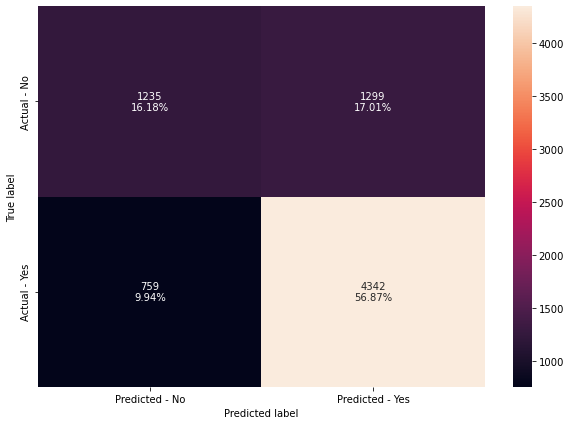

In [140]:
make_confusion_matrix(xgb,y_test)

* The XGBoost Classifier model is overfitting and is therefore not a improvement on the Gradient Classifier model.

In [141]:
# defining list of models
models = [bagging_estimator, rf_estimator, abc, gbc, xgb]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_score_train = []
f1_score_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))
    f1_score_train.append(np.round(j[6],2))
    f1_score_test.append(np.round(j[7],2))

In [142]:
comparison_frame = pd.DataFrame({'Model':['Bagging classifier (default)', 'Random forest (default)',
                                        'AdaBoost (default)', 
                                          'Gradient Boosting (default)', 
                                          'XGBoost (default)'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                          'Train_F1_score':f1_score_train,'Test_F1_score':f1_score_test}) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1_score,Test_F1_score
0,Bagging classifier (default),0.98,0.70,0.99,0.78,0.99,0.77,0.99,0.78
1,Random forest (default),1.00,0.72,1.00,0.83,1.00,0.77,1.00,0.80
2,AdaBoost (default),0.74,0.73,0.89,0.88,0.76,0.76,0.82,0.82
3,Gradient Boosting (default),0.76,0.75,0.88,0.87,0.78,0.78,0.83,0.82
4,XGBoost (default),0.83,0.73,0.93,0.85,0.84,0.77,0.88,0.81


* The best preforming model currently is Gradient Boosting. Followed by AdaBoost. The others overfitted the data. Now let's try to improve these models using hyperparameters.

##  Will tuning the hyperparameters improve the model performance?

###  Bagging Classifier tuned

In [143]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=1, n_estimators=30,
                  random_state=1)

In [144]:
#Using above defined function to get accuracy, recall, precision and F1_score on train and test set
bagging_estimator_tuned_score=get_metrics_score(bagging_estimator_tuned)

Accuracy on training set :  0.6680889288120369
Accuracy on test set :  0.6681074001309758
Recall on training set :  1.0
Recall on test set :  1.0
Precision on training set :  0.6680889288120369
Precision on test set :  0.6681074001309758
F1 score on training set :  0.8010231556273559
F1 score on test set :  0.801036432160804


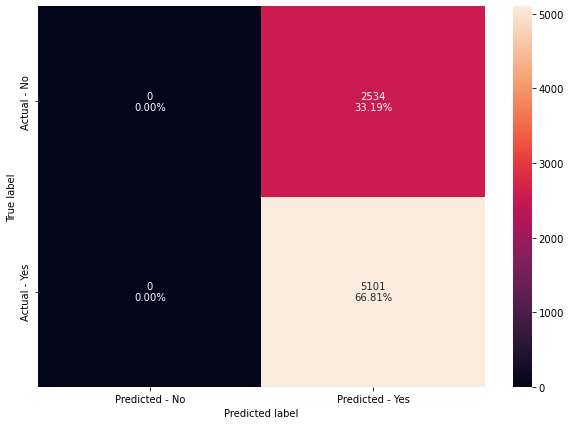

In [145]:
make_confusion_matrix(bagging_estimator_tuned,y_test)

* The tuned Bagging Classifier model is not overfitting. Therefore this model is better than the default Bagging Classifier model.
* However this model did not perform as well as the Gradient Boosting model. For 2 reasons. Firstly, for the Gradient Boosting model, the scores of accuracy, recall, precision and F1_score are similiar. However, with this model there is a large discrepency between recall and the other scores. Secondly, this model has low scores for Accuracy and Precision, and a lower F1 score compared to the Gradient Boosting model.

* Let's try the tuned Random Forest Classifier

###  Random Forest Classifier tuned

In [146]:
# Choose the type of classifier. 
rf_estimator_tuned = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {"n_estimators": [50,100,150],
    "min_samples_leaf": np.arange(3, 7),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.1),
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(max_features=0.2, max_samples=0.3, min_samples_leaf=5,
                       random_state=1)

In [147]:
#Using above defined function to get accuracy, recall, precision and F1_score on train and test set
rf_estimator_tuned_score=get_metrics_score(rf_estimator_tuned)

Accuracy on training set :  0.7688636874017516
Accuracy on test set :  0.7469548133595285
Recall on training set :  0.894453781512605
Recall on test set :  0.8749264850029406
Precision on training set :  0.7881525360977416
Precision on test set :  0.7752301545944068
F1 score on training set :  0.8379452863609526
F1 score on test set :  0.822066678946399


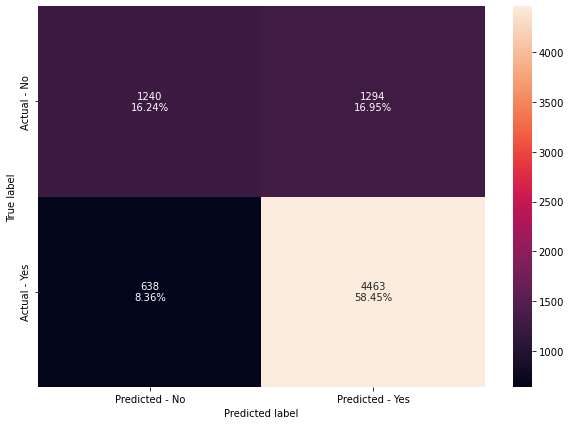

In [148]:
make_confusion_matrix(rf_estimator_tuned,y_test)

* The tuned Random Forest Classifier model is not overfitting. Therefore this model is better than the default Random Forest Classifier model.
* The differences between this model and the Gradient boosting model are very small. However, this model is preforming ever so slightly better in terms of Accuracy, Recall, and the F1 score.
* We can therefore deduce that the tuned Random Forest Classifier model is the best model so far.

* Let's try using class_weights for random forest

###  Random Forest Classifier class_weights

In [149]:
# Choose the type of classifier. 
rf_estimator_weighted = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "class_weight": [{0: 0.3, 1: 0.7}],
    "n_estimators": [20,50,100,150],
    "min_samples_leaf": np.arange(3, 7),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_weighted, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_weighted = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_weighted.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, max_features=0.2,
                       max_samples=0.3, min_samples_leaf=6, n_estimators=150,
                       random_state=1)

In [150]:
#Using above defined function to get accuracy, recall, precision and F1_score on train and test set
rf_estimator_weighted_score=get_metrics_score(rf_estimator_weighted)

Accuracy on training set :  0.7331012800359308
Accuracy on test set :  0.7098886705959397
Recall on training set :  0.9796638655462185
Recall on test set :  0.9621642815134287
Precision on training set :  0.7209647495361781
Precision on test set :  0.7082251082251082
F1 score on training set :  0.8306376914855718
F1 score on test set :  0.8158922782811071


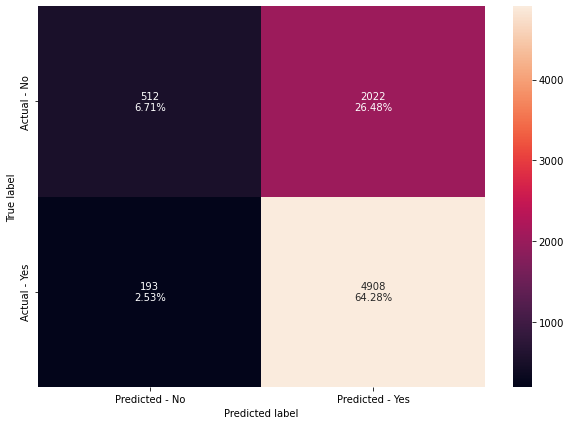

In [151]:
make_confusion_matrix(rf_estimator_weighted,y_test)

* The tuned Random Forest Classifier model with class_weights is not overfitting. 
* The model has a better recall score compared to the tuned Random Forest Classifier model.
* However, the model has a lower score for accuracy, precision, and F1 score. Therefore this model is not has high performing as the tuned Random Forest Classifer model.

* Let's try tuned AdaBoost Classifier

###  Tuned AdaBoost Classifier

In [152]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1, random_state=1),DecisionTreeClassifier(max_depth=2, random_state=1),DecisionTreeClassifier(max_depth=3, random_state=1)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=20, random_state=1)

In [153]:
#Using above defined function to get accuracy, recall, precision and F1_score on train and test set
abc_tuned_score=get_metrics_score(abc_tuned)

Accuracy on training set :  0.6916123961374354
Accuracy on test set :  0.6910281597904387
Recall on training set :  0.9715966386554622
Recall on test set :  0.9684375612624976
Precision on training set :  0.6916312735538673
Precision on test set :  0.6920706080134491
F1 score on training set :  0.8080511584023483
F1 score on test set :  0.8072554947299616


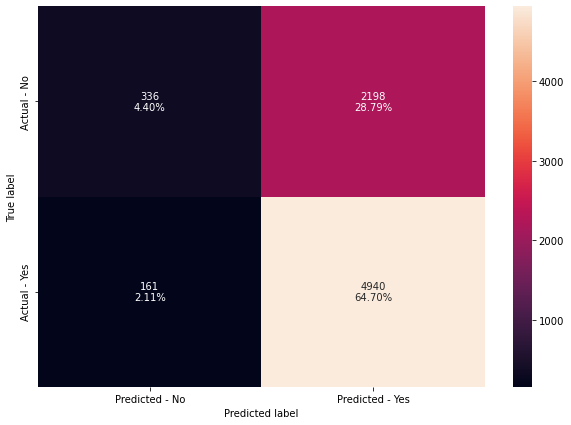

In [154]:
make_confusion_matrix(abc_tuned,y_test)

* The tuned AdaBoost Classifier model is not overfitting. 
* However the model is not performing as well as the default AdaBoost Classifier model nor the tuned Random Forest Classifier model. 

* Let's try the tuned Gradient Boosting Classifier

### Tuned Gradient Boosting Classifier

In [155]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [20,50,100,150],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=1, n_estimators=20, random_state=1,
                           subsample=1)

In [156]:
#Using above defined function to get accuracy, recall, precision and F1_score on train and test set
gbc_tuned_score=get_metrics_score(gbc_tuned)

Accuracy on training set :  0.685773635751179
Accuracy on test set :  0.6848722986247544
Recall on training set :  0.9878991596638655
Recall on test set :  0.9874534405018623
Precision on training set :  0.6831309198675112
Precision on test set :  0.6826128201653341
F1 score on training set :  0.8077226974475249
F1 score on test set :  0.8072115384615384


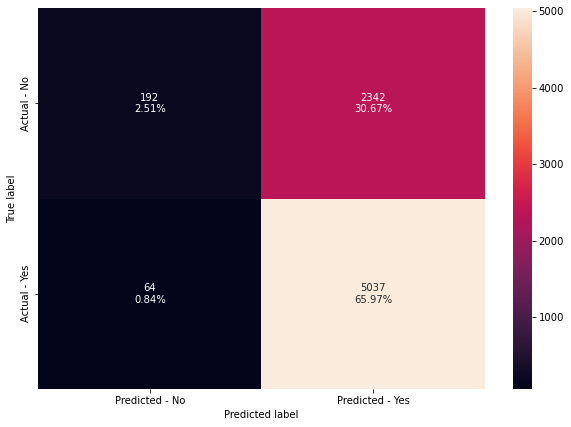

In [157]:
make_confusion_matrix(gbc_tuned,y_test)

* The tuned Gradient Boost Classifier model is not overfitting. 
* However the model is not performing as well as the default Gradient Boost Classifier model nor the tuned Random Forest Classifier model. 

* Let's try the tuned XGBClassifier model

### Tuned XGBClassifier model

In [160]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1,eval_metric='logloss')

# Grid of parameters to choose from
## add from
parameters = {
    "n_estimators": np.arange(10,30,50),
    "scale_pos_weight":[1,2,5],
    "subsample":[0.7,0.9,1.0],
    "learning_rate":[0.05,0.1,0.2],
    "colsample_bytree":[0.5,0.6,0.7],
    "colsample_bylevel":[0.5,0.6,0.7]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=0.5, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=1, reg_alpha=0, reg_lambda=1, ...)

In [161]:
#Using above defined function to get accuracy, recall, precision and F1_score on train and test set
xgb_tuned_score=get_metrics_score(xgb_tuned)

Accuracy on training set :  0.6682012126656187
Accuracy on test set :  0.6681074001309758
Recall on training set :  1.0
Recall on test set :  1.0
Precision on training set :  0.6681639528354857
Precision on test set :  0.6681074001309758
F1 score on training set :  0.8010770784247728
F1 score on test set :  0.801036432160804


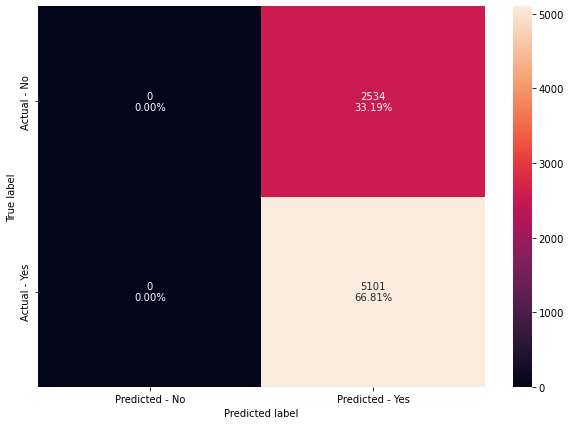

In [162]:
make_confusion_matrix(xgb_tuned,y_test)

* The tuned XGBClassifier model is not overfitting. 
* However the model is not performing as well as the tuned Random Forest Classifier model. 

## Model Performance Comparison and Conclusions

In [163]:
# defining list of models
models = [bagging_estimator, bagging_estimator_tuned, rf_estimator, rf_estimator_tuned, rf_estimator_weighted, abc, abc_tuned, 
          gbc, gbc_tuned, xgb, xgb_tuned]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_score_train = []
f1_score_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))
    f1_score_train.append(np.round(j[6],2))
    f1_score_test.append(np.round(j[7],2))

In [164]:
comparison_frame = pd.DataFrame({'Model':['Bagging classifier (default)', "Bagging classifier (tuned)",
                                          'Random forest (default)', "Random forest (tuned)", "Random forest (weighted)",
                                          'AdaBoost (default)', "AdaBoost (weighted)",
                                          'Gradient Boosting (default)', "Gradient Boosting (tuned)", 
                                          'XGBoost (default)',"XGBoost (tuned)"], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                          'Train_F1_score':f1_score_train,'Test_F1_score':f1_score_test}) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1_score,Test_F1_score
0,Bagging classifier (default),0.98,0.70,0.99,0.78,0.99,0.77,0.99,0.78
1,Bagging classifier (tuned),0.67,0.67,1.00,1.00,0.67,0.67,0.80,0.80
2,Random forest (default),1.00,0.72,1.00,0.83,1.00,0.77,1.00,0.80
3,Random forest (tuned),0.77,0.75,0.89,0.87,0.79,0.78,0.84,0.82
4,Random forest (weighted),0.73,0.71,0.98,0.96,0.72,0.71,0.83,0.82
5,AdaBoost (default),0.74,0.73,0.89,0.88,0.76,0.76,0.82,0.82
6,AdaBoost (weighted),0.69,0.69,0.97,0.97,0.69,0.69,0.81,0.81
7,Gradient Boosting (default),0.76,0.75,0.88,0.87,0.78,0.78,0.83,0.82
8,Gradient Boosting (tuned),0.69,0.68,0.99,0.99,0.68,0.68,0.81,0.81
9,XGBoost (default),0.83,0.73,0.93,0.85,0.84,0.77,0.88,0.81


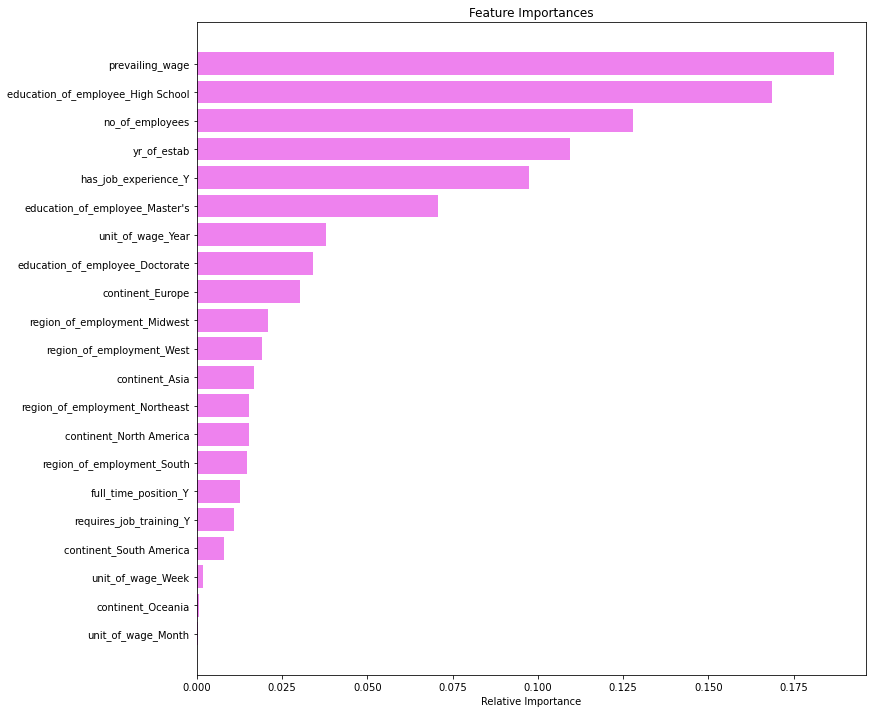

In [166]:
#Check which features the tuned random forest model (the best fit model) considered the most important for prediction
importances = rf_estimator_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Comments on modelling
* We have been able to build a predictive model that can be used by INA to identify which applicants will be certified for a working visa with an f1_score of 0.84 on the training set and 0.82 on the test set.

* The f1_score for the tuned Random Forest Classifier model was higher than the other models. It is therefore advised to use this model.

* The model considered these 5 features to be the most important for predicition:
    * Prevailing wage
    * Education of employee (High school)
    * Number of employees
    * Year of establishment
    * Has job experience

## Actionable Insights and Recommendations

#### Observations from EDA:

- Most applications come from Asia (66.2%). Second most common is Europe (14.6%) and third is North America (12.9%).
- Most applications have bachelor's (40.2%). Second most common is a master's (37.8%), followed by a high school diploma (13.4%), followed by a doctorate (8.6%).
- 58.1% of applicants have job experience. The others have no previous experience.
- 88.4% of applicants do not require job training.
- Most applications are looking for work in the Northeast region (28.3%). Second most common is the South (27.5%), followed by the West (25.8%). Island region is the least common (1.5%).
- Median prevailing wage is around 65'000 USD. Prevailing wage ranges from 0 to 300'000.
- Most common unit of wage is year (90.1%). Second most common is hour (8.5%), followed by week (1.1%), followed by month (0.3%).
- Most applicants are applying for full time positions (89.4%).
- 66.8% of applicants are certified and approved for a working visa. 33.2% are denied.
- Chances of being accepted varies depending on the region. Applicants from South America have the lowest chance of being certified (about 60%), while applicants from Europe have the highest chance (about 80%).
- Chances of being accepted varies depending on a applicants level of education. Applicants with only a high school diploma have the lowest chance (about 35%). Applicants with a doctorate have the highest chance (about 90%).
- Applicants with previous job experience have a higher chance of being certified. (About 75% compared to about 60% for unexperienced applicants).
- Where applicants are applying affects there chances. Applicants who apply to the Midwest have about 75% chance of being certified. The highest of the regions.Applicants who apply to either the Island, the West, or the Northeast region have about 60% chance of being certified. The lowest of the regions.
- Applicants who apply for a position with a lower prevailing wage are less likely to be certified. 
- Chances of being accepted varies depending on unit of wage. Applicants who apply for hourly salaries have the lowest chance of being certified (about 40%). Applicants who apply for yearly salaries have the highest chance (about 70%).
- Applicants with a master's are on average applying for the highest salary positions. Applicants with a doctorate are on average applying for the lowest salary positions.
- Applicants with job experience are less likely to need job training. About 10% need training. Applicants with no job experience are more likely to need job training. About 20% need training.
- Positions in Island have the highest prevailing wage, followed by the Midwest, followed by the South.



#### Recommendations

- Overall, the tuned Random Forest Classifier model performed better than the other models. The model's F1_score was 0.84 on the training set and 0.82 on the test set. It is therefore advised to use this model.

- Based on the model, the features that affect visa certification are the following:
    * Prevailing wage
    * Education of employee (High school)
    * Number of employees
    * Year of establishment
    * Has job experience
        
- Applicants who apply for a position with a lower prevailing wage are less likely to be certified. Applicants might be applying for a lower paying job for several reasons. For example they might have fewer educational qualificiations, and are less experienced. INA should consider giving these positions to US citizens since there are sufficient individuals locally based who can fufill these positions. 
- Applicants with only a high school diploma have about 35% chance of being certified. The lowest of the education levels. Applicants with only a high school diploma might only be applying for lower prevailing wage positions. INA should consider giving these positions to US citizens since there are sufficient individuals locally based who can fufill these positions.
- Applicants with previous job experience have a higher chance of being certified. (About 75% compared to about 60% for unexperienced applicants. INA should give priority to applicants with experience since these individuals will help enrich the working force.